## Lecture 12. OpenCV - 1 

**'Learning Open-source Software', School of computing, Gachon Univ.**

**OpenCV : real-time computer vision (실시간 컴퓨터 영상인식)**  

다양한 알고리즘과 모델이 내장되어 있음   
image manipulation, object recognition, face recognition using MediaPipe, pose estimation...

semantic gap : like MNIST dataset -> 모든 image는 컴퓨터 입장에서는 각 픽셀이 색깔정보 (숫자)로 보임  
(http://cs231n.stanford.edu/)

--------

#### 일반 이미지 출력

In [9]:
# 일반 이미지 출력

import cv2

img = cv2.imread('image.jpg')
cv2.imshow('img', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

# mac에서 opencv 팝업창 안닫힐때 뒤에 항상 붙여주기
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

-1

#### 일반 이미지 출력 (matplotlib)

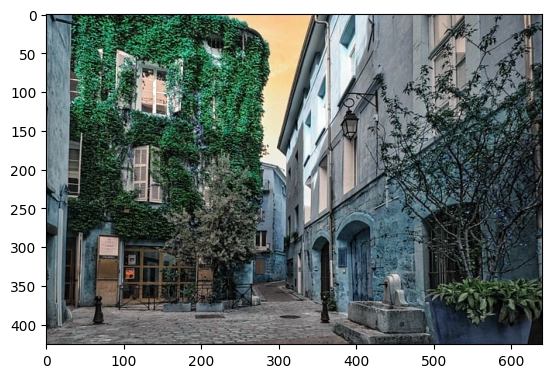

size of this img :  (426, 640, 3)


In [14]:
# matplotlib에 이미지 띄우기 : https://bigdata-analyst.tistory.com/135

import matplotlib.pyplot as plt
import cv2

def show_img (img) : 
    plt.imshow(img)
    plt.show()

img = cv2.imread('image.jpg', cv2.COLOR_BGR2RGB) # imread의 return값은 numpy array
# matplotlib로 출력하게 되면 array의 component가 RGB가 아니라 BGR값이 저장되어 있기 때문에 cv2.COLOR_BGR2RGB 옵션 세팅 필요
show_img(img)

print ('size of this img : ', img.shape) # image의 크기를 return (height, weight, channel / px 단위)

#### 비디오 파일 읽기

In [2]:
# 비디오 읽기 

import cv2

cap = cv2.VideoCapture('vid.mp4') # video 파일을 어떤 object로 인식 

while (cap.isOpened()) : # 파일이 열려있는 상황이면 (파일이 끝나기 전까지)
    ret, frame = cap.read() # video 파일을 읽음 
    # ret : 영상이 정상적인지 여부 출력 (정상이면 True, 비정상이면 False)
    
    if ret : 
        cv2.imshow ('vid', frame)
        
        if cv2.waitKey(1) == ord('q') :  # waitkey(n) : n으로 속도 조절
            print('사용자 입력에 의해 종료')
            break
    
    else :
        break
    
cap.release() # 동영상 파일 닫고 메모리 해제

# mac에서 opencv 팝업창 안닫힐때 뒤에 항상 붙여주기
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

-1

#### 웹캠 출력

In [3]:
# 웹캠 출력

import cv2

cap = cv2.VideoCapture(0)

while (cap.isOpened()) :
    ret, frame = cap.read() 
    # ret : 영상이 정상적인지 여부 출력 (정상이면 True, 비정상이면 False)
    
    if ret : 
        cv2.imshow ('camera', frame)
        
        if cv2.waitKey(1) == ord('q') :  # waitkey(n) : n으로 속도 조절
            print('사용자 입력에 의해 종료')
            break
    
    else :
        break

cap.release() # 동영상 파일 닫고 메모리 해제

# mac에서 opencv 팝업창 안닫힐때 뒤에 항상 붙여주기
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

2023-11-23 19:30:58.261 Python[13077:4291958] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


사용자 입력에 의해 종료


-1

#### 이미지 자르기

(426, 640, 3)
(126, 350, 3)


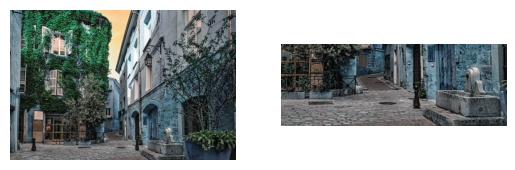

In [9]:
# matplotlib에 2개 띄우기 : https://deep-learning-study.tistory.com/100

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('image.jpg')
slicing = img[300:600, 150:500].copy() # 굳이 numpy를 쓰지 않아도 충분히 자르기 가능
# [세로범위, 가로범위].copy()

print (img.shape)
print (slicing.shape)

plt.subplot(121), plt.axis('off'), plt.imshow(img)
plt.subplot(122), plt.axis('off'), plt.imshow(slicing)
plt.show()

#### 사이즈 확대, 축소

(426, 640, 3)
(126, 350, 3)


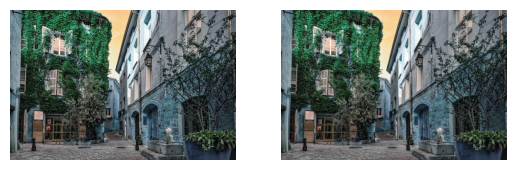

In [15]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('image.jpg')
resizing = cv2.resize(img, None, fx=0.5, fy=0.5) # x, y 비율 정의 (0.5배 축소)

print (img.shape)
print (slicing.shape)

plt.subplot(121), plt.axis('off'), plt.imshow(img)
plt.subplot(122), plt.axis('off'), plt.imshow(resizing)
plt.show()

# matplotlib에서는 일반적으로 두 그림이 서로 닮음이면 사이즈 조절하여 같은 크기로 출력함

In [16]:
import cv2

img = cv2.imread('image.jpg')
resizing = cv2.resize(img, None, fx=0.5, fy=0.5) # x, y 비율 정의 (0.5배 축소)

cv2.imshow ('ori', img)
cv2.imshow ('resize', resizing)

cv2.waitKey(0)

cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

-1

\* **보간법**

1. cv2.INTER_AREA : 크기를 줄일 때 사용
2. cv2.INTER_CUBIC : 크기를 늘릴 때 사용 (속도 느림, 퀄리티 좋음)
3. cv2.INTER_LINEAR : 크기를 늘릴 때 사용 (기본값)

fx, fy 뒤에 붙이면 됨

#### 뒤집기

In [17]:
import cv2 

cap = cv2.VideoCapture(0)

while True : 
    ret, frame = cap.read()
    
    if ret : 
        flipframe = cv2.flip(frame, 1) 
        # flipcode > 0 : 좌우 대칭
        cv2.imshow ('flip', flipframe)
        
        if cv2.waitKey(1) == ord('q') : 
            print ("quit")
            break;
        
cv2.waitKey(0)

cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

quit


#### 경계선 검출 (threshold)

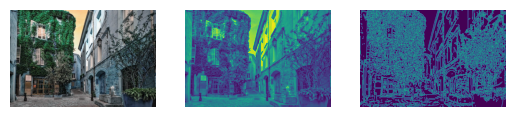

In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 150, 200) # 경계선 검출하기
# 대상 이미지, minVal (threshold), maxVal (threshold)

plt.subplot(131), plt.axis('off'), plt.imshow(img)
plt.subplot(132), plt.axis('off'), plt.imshow(gray)
plt.subplot(133), plt.axis('off'), plt.imshow(canny)

plt.show()
